In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
appData = pd.read_csv("googleplaystore.csv")
dataUserReview = pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
appData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
appData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#Først sørger vi for at fjerne NaN værdier for at gøre det nemmere for os selv i fremtiden da vi skal predicte en rating
appData.dropna(inplace=True)

In [6]:
appData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [7]:
ValCategory = appData["Category"].unique()
ValCategoryCount = len(ValCategory)
StringCategory = appData["Category"]
category = {}
for i in range(0,ValCategoryCount):
    category[ValCategory[i]] = i
appData["Category_new"] = appData["Category"].map(category).astype(int)

In [8]:
ValGenre = appData.Genres.unique()
genre = {}
for i in range(len(ValGenre)):
    genre[ValGenre[i]] = i
appData['Genres_new'] = appData['Genres'].map(genre).astype(int)
    

In [9]:
#Convert Content rating to Int
ValContentRating = appData['Content Rating'].unique()
contentRating = {}
for i in range(len(ValContentRating)):
    contentRating[ValContentRating[i]] = i
appData['Content Rating'] = appData['Content Rating'].map(contentRating).astype(int)

In [10]:
#Convert Type to Int
def TypeInt(types):
    if types == 'Free':
        return 0
    else:
        return 1
appData['Type'] = appData['Type'].map(TypeInt)

In [11]:
#Convert Size til float64
def SizeFloat64(size):
    if 'M' in size:
        new_size = size[:-1]
        new_size = float(new_size)*1000000
        return new_size
    elif 'k' == size[-1:]:
        new_size = size[:-1]
        new_size = float(new_size)*1000
        return new_size
appData['Size'] = appData['Size'].map(SizeFloat64)


#Da vi antallet af Size ikke er det samme som de andre så bruger vi ffil til at få det samme antal

appData.Size.fillna(method = 'ffill', inplace = True)
        

In [12]:
#Convert Installs to Int
appData['Installs'] = [int(i[:-1].replace(',','')) for i in appData['Installs']]

In [13]:
#Convert Reviews til Int
appData['Reviews'] = appData['Reviews'].astype(int)

In [14]:
#Convert Price til Float64
def priceFloat64(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price
    
appData['Price'] = appData['Price'].map(priceFloat64).astype(float)

In [15]:
#Vi fjerne til sidst parametre som vi ikke mener vil være til gavn for os
appData.drop(labels = ['App','Last Updated','Current Ver','Android Ver'],axis = 1, inplace = True)

In [16]:
appData.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_new,Genres_new
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [17]:
#Her er Category fordelt på hver sin column
appData2 = pd.get_dummies(appData, columns=['Category'])

In [18]:
appData2.head()


,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_new,Genres_new,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


In [19]:
appData2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 43 columns):
Rating                          9360 non-null float64
Reviews                         9360 non-null int32
Size                            9360 non-null float64
Installs                        9360 non-null int64
Type                            9360 non-null int64
Price                           9360 non-null float64
Content Rating                  9360 non-null int32
Genres                          9360 non-null object
Category_new                    9360 non-null int32
Genres_new                      9360 non-null int32
Category_ART_AND_DESIGN         9360 non-null uint8
Category_AUTO_AND_VEHICLES      9360 non-null uint8
Category_BEAUTY                 9360 non-null uint8
Category_BOOKS_AND_REFERENCE    9360 non-null uint8
Category_BUSINESS               9360 non-null uint8
Category_COMICS                 9360 non-null uint8
Category_COMMUNICATION          9360 non-null uint8
C

In [20]:
X = appData2.drop(labels = ['Rating', 'Category_new','Genres'],axis = 1)
y = appData2['Rating'].values
y = y.astype('int')


In [21]:
#Splitter data op i 1/5 til test og 4/5 til training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
#Vi vil nu sammenligne 3 forskellige modeller som ligner hinanden
#Random Forest, SVM, logistic_Regression

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
rf_cm = confusion_matrix(y_test,rf_predict)
rf_accuracy = accuracy_score(rf_predict, y_test)


Random Forest accuracy: 0.7526709401709402


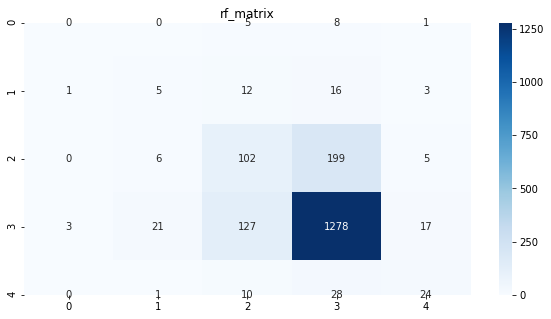

In [25]:
import seaborn as sns
plt.figure(figsize =(10,5))
plt.title("rf_matrix")
sns.heatmap(rf_cm,annot=True,cmap="Blues", fmt="d")
print('Random Forest accuracy:',rf_accuracy )


In [26]:
#SVM
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')
svc.fit(X_train,y_train)
svc_predict = svc.predict(X_test)
svc_matrix = confusion_matrix(y_test, svc_predict)
svc_accuracy = accuracy_score(y_test,svc_predict)


SVM accuracy: 0.7724358974358975


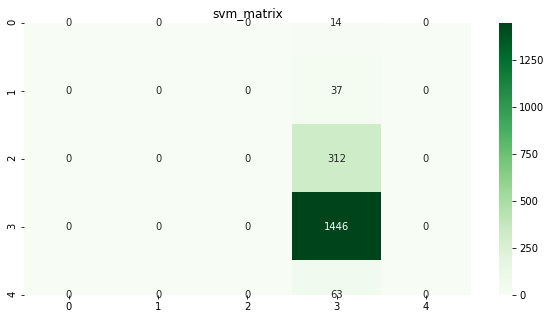

In [27]:
plt.figure(figsize = (10,5))
plt.title("svm_matrix")
sns.heatmap(svc_matrix,annot=True, cmap ="Greens", fmt = "d")
print('SVM accuracy:', svc_accuracy)


In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test,lr_predict)



C:\Users\Thomas Berthel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thomas Berthel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


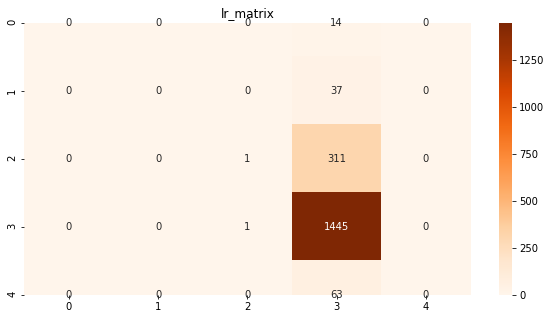

Logistic Regression accuracy: 0.7724358974358975


In [29]:
plt.figure(figsize=(10,5))
plt.title("lr_matrix")
sns.heatmap(lr_matrix,annot=True,cmap="Oranges",fmt="d")
plt.show()
print('Logistic Regression accuracy:', lr_accuracy)

Text(0.5, 1.0, 'Model comparision')

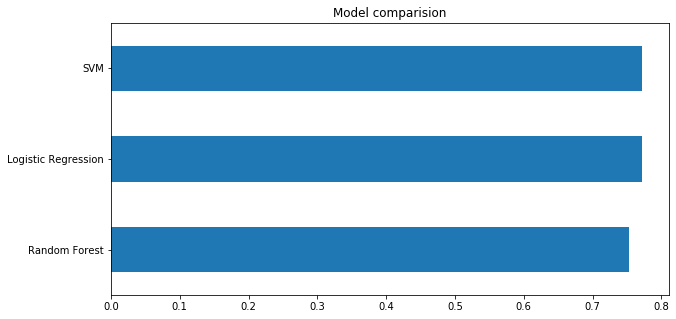

In [30]:
#Sammenligning af vores 3 modeller
import matplotlib.pyplot as plt
%matplotlib inline

model_co = pd.Series(data=[lr_accuracy,svc_accuracy,rf_accuracy],index=['Logistic Regression', 'SVM', "Random Forest"])
figure = plt.figure(figsize =(10,5))
model_co.sort_values().plot.barh()
plt.title('Model comparision')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svc_predict))
print(classification_report(y_test,rf_predict))
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00       312
           4       0.77      1.00      0.87      1446
           5       0.00      0.00      0.00        63

    accuracy                           0.77      1872
   macro avg       0.15      0.20      0.17      1872
weighted avg       0.60      0.77      0.67      1872

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.15      0.14      0.14        37
           3       0.40      0.33      0.36       312
           4       0.84      0.88      0.86      1446
           5       0.48      0.38      0.42        63

    accuracy                           0.75      1872
   macro avg       0.37      0.35      0.36      1872
weighted avg       0.73      0.75      0.74      1872

              precisio

C:\Users\Thomas Berthel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, svc_predict)
mse1 = mean_squared_error(y_test, lr_predict)
mse2 = mean_squared_error(y_test, rf_predict)
print(mse)
print(mse2)
print(mse1)

0.3466880341880342
0.4107905982905983
0.3466880341880342


<Figure size 1008x720 with 0 Axes>

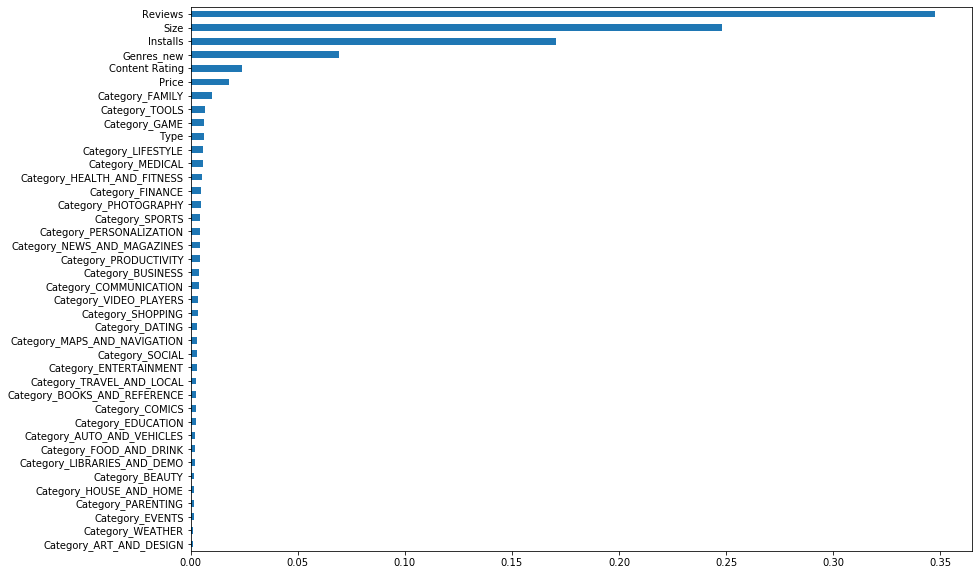

In [33]:
importens_features = {}
for col,feat in zip(X.columns,rf.feature_importances_):
    importens_features[col] = feat

impFeatDF = pd.DataFrame().from_dict(importens_features,orient = 'index')
impFeatDF.sort_values(by = 0, inplace = True)
impFeatDF.rename(index =str, columns = {0:'Pct'},inplace = True)


plt.figure(figsize = (14,10))
impFeatDF.plot(kind = 'barh',figsize=(14,10),legend = False)
plt.show()

In [34]:
coefs = lr.coef_[0]
top_three= np.argpartition(coefs,-3)[-3:]
top_three_sorted = top_three[np.argsort(coefs[top_three])]
print(X.columns[top_three_sorted])

Index(['Category_PRODUCTIVITY', 'Category_MEDICAL', 'Category_DATING'], dtype='object')


In [35]:
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [36]:
from sklearn.model_selection import validation_curve
num_est = np.linspace(1,100,20).astype(int)
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = num_est, cv = 3)

In [37]:
print(train_scoreNum)


[[0.88639551 0.88060897 0.88103345]
 [0.97575636 0.97175481 0.97156018]
 [0.9867762  0.98477564 0.98898458]
 [0.9933881  0.99358974 0.99639495]
 [0.99719495 0.99619391 0.99499299]
 [0.99699459 0.99799679 0.99679551]
 [0.99799639 0.99719551 0.99859804]
 [0.99879784 0.9989984  0.99879832]
 [0.99919856 0.99859776 0.99959944]
 [0.99919856 0.99919872 0.99939916]
 [0.9989982  0.99959936 0.99919888]
 [0.99979964 0.99959936 0.99979972]
 [0.99979964 0.99959936 0.99939916]
 [0.99939892 0.99939904 0.99959944]
 [0.99979964 0.99979968 0.99979972]
 [0.99979964 0.99979968 0.99979972]
 [0.99979964 0.99959936 0.99979972]
 [0.99979964 0.99979968 0.99979972]
 [0.99979964 0.99979968 0.99979972]
 [0.99979964 0.99979968 0.99979972]]


In [38]:
print(test_scoreNum)

[[0.69763716 0.68028846 0.69098196]
 [0.71766119 0.71514423 0.73146293]
 [0.74529435 0.7431891  0.73386774]
 [0.74889868 0.74399038 0.73306613]
 [0.752503   0.75440705 0.74388778]
 [0.75210252 0.74599359 0.74669339]
 [0.75330396 0.74759615 0.74468938]
 [0.75450541 0.75040064 0.749499  ]
 [0.75570685 0.74839744 0.7498998 ]
 [0.75610733 0.75240385 0.75150301]
 [0.75530637 0.75200321 0.75150301]
 [0.75410493 0.75520833 0.75350701]
 [0.75730877 0.75560897 0.75310621]
 [0.75810973 0.75120192 0.74789579]
 [0.75490589 0.75480769 0.75751503]
 [0.76011213 0.75080128 0.75711423]
 [0.75690829 0.75360577 0.75511022]
 [0.76051262 0.75160256 0.75190381]
 [0.75770925 0.75200321 0.75350701]
 [0.75690829 0.75240385 0.75270541]]


In [39]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [55]:
#Attempt to improve logistisk regression accuracy

from sklearn.model_selection import GridSearchCV

print("Loading...")

grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}


grid_search = GridSearchCV(lr, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X=X_train, y=y_train)
print("-----------")
print(grid_search.best_score_)
print(grid_search.best_params_)

Loading...


C:\Users\Thomas Berthel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


-----------
0.7544070512820513
{'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}
